Assignment 3 (due on 11/22)

Student:郑炜（12332242），Gtihub：fytctctvy

批改人：赵淑慧

得分：55/60

In [2]:
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# PS1. Niño 3.4 index
19/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。——3mth running mean的label标错线。9/10

In [4]:
# 1. Niño 3.4 index
# 1.1 
# 先将170W-120W转换为经度：190-240
ds_1 = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc",engine="netcdf4")

# 选出特定区域的数据(the South American coast)
SST_SAC = ds_1.sel(lat=slice(-5,5),lon=slice(190,240))
# monthly climatology
SST_SAC_mean = SST_SAC.sst.groupby('time.month').mean(dim = 'time')
# 数据按月分组再减去对应的平均值
SST_anomalies = SST_SAC.sst.groupby("time.month")- SST_SAC_mean
SST_anomalies

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

C:\Users\zsh\AppData\Local\Temp\ipykernel_27348\2070765726.py:7: RuntimeWarning: Mean of empty slice
  y = np.nanmean(SST_anomalies_rolling,axis = (1,2))


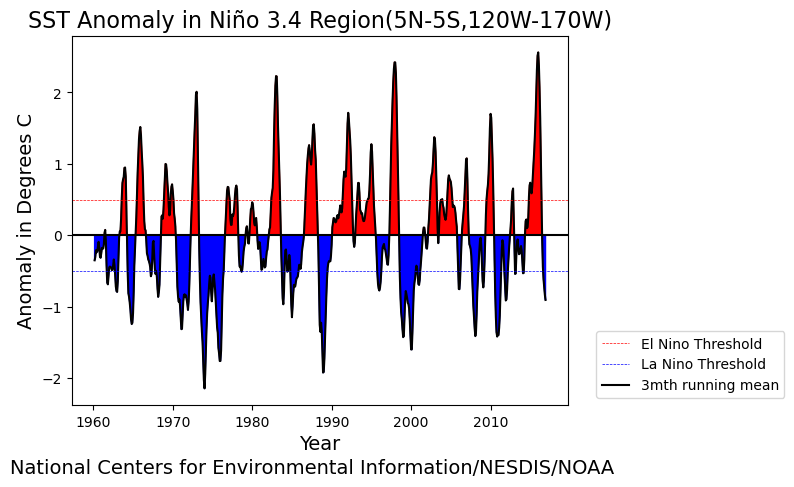

In [5]:
# 1.2
# 先求anomalies的三个月滑动平均，时间是从1960.01.15到2016.12.15共684个月
# 参考：https://blog.csdn.net/weixin_43343144/article/details/102823058
SST_anomalies_rolling = SST_anomalies.rolling(time=3, center=True).mean()
# 下面开始作图并对图进行调整
x = pd.date_range(start = '1960-01',periods = 684, freq = 'm')
y = np.nanmean(SST_anomalies_rolling,axis = (1,2))
plt.plot(x,y,'k-')
# 颜色填充参考：https://blog.csdn.net/HHG20171226/article/details/101650909
plt.fill_between(x,y,where=(y<0),color='blue')
plt.fill_between(x,y,where=(y>0),color='red')
plt.title('SST Anomaly in Niño 3.4 Region(5N-5S,120W-170W)',fontsize=16)
plt.suptitle('National Centers for Environmental Information/NESDIS/NOAA',y = 0,fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Anomaly in Degrees C',fontsize=14)
plt.axhline(y=0.5,color ="red", linestyle ="--",linewidth=0.5, label='El Nino Threshold')
plt.axhline(y=-0.5,color ="blue", linestyle ="--",linewidth=0.5,label='La Nino Threshold')
plt.axhline(y=0,color ="black", linestyle ="-",linewidth=1.5,label='3mth running mean')
# 图例的位置参考：https://blog.csdn.net/john_xyz/article/details/54754937
plt.legend(fontsize=10,loc=4, bbox_to_anchor=(1.45,0))
plt.show()

# PS2. Earth’s energy budget
27/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——图片缺少图名和单位；对两种TOA的差异解释较详细。4+1/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——格网面积计算的解释很详细。10+1/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——图片最好加上图名；时间不应该sum，应该mean，见修正代码。4/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——图片缺少图名和单位；提出两种想法，第二种符合题意。4+1/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？解题思路不符合题意，见参考代码。2/5

In [6]:
# 2. Earth’s energy budget
# 先读取数据
ds_2 = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc",engine="netcdf4")
ds_2 

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

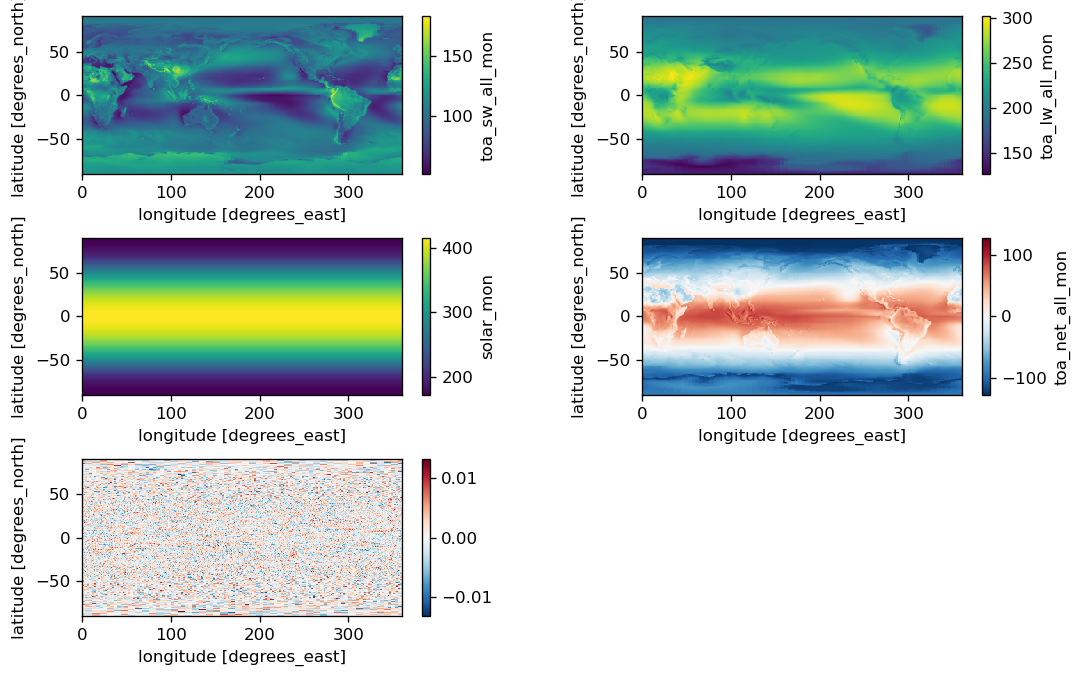

In [7]:
# 2.1
plt.figure(figsize = (8,5), dpi = 120) 
# the time-mean TOA shortwave
plt.subplot(3,2,1)
sw = ds_2.toa_sw_all_mon.mean(dim = 'time')
sw.plot()

# the time-mean TOA longwave
plt.subplot(3,2,2)
lw = ds_2.toa_lw_all_mon.mean(dim = 'time')
lw.plot()

# the time-mean solar radiation
plt.subplot(3,2,3)
solar = ds_2.solar_mon.mean(dim = 'time')
solar.plot()

# the time-mean TOA net flux
plt.subplot(3,2,4)
net = ds_2.toa_net_all_mon.mean(dim = 'time')
net.plot()

# 计算得到的平均净通量
plt.subplot(3,2,5)
# cal_net为计算得到的TOA净通量
cal_net = solar - sw - lw
# cal为TOA净通量的计算值减去实际值
cal = cal_net - net
cal.plot()

plt.tight_layout()
# 子图间距调整参考：https://blog.csdn.net/qq_35240689/article/details/131361568#
plt.subplots_adjust(left = 0, right = 1, top = 1, bottom = 0, wspace = 0.4, hspace = 0.4)
plt.show()
# 从图5可以看出TOA净通量与计算值并不完全相等，因为除了长波和短波辐射，对流和蒸发过程也会改变能量（所以实际计算应加上这两部分）

In [8]:
# 2.2 (1.先求TOA incoming solar,三个数值计算步骤相同，这里分开计算)
import math
val = math.pi
# 将地球视为圆球，半径为6371 km，由于经度1°对应的长度都相同等于ΠR/180 = 111
# 而纬度1°对应的长度等于2ΠR×cosσ/360 = 111*cosσ（其中σ为纬度）
# 若将经度×纬度（1°×1°）视为一个网格，每个网格是梯形，为了简化计算将其视为矩形
# 每个网格面积为（ΠR/180）×（2ΠR×cosσ/360）= 12321*cosσ（平方千米）,即1.2321*(10**10)*cosσ 平方米

# 对每个位置的值取时间平均，2.1中已经已求过，为solar
solar = ds_2.solar_mon.mean(dim = 'time')
# 再对每个纬度位置取经度平均
solar_lat_mean = solar.mean(dim='lon')
# 新建DataFrame
df = pd.DataFrame()
df['lat_1']=solar_lat_mean['lat']
df['solar_lat_mean']=np.array(solar_lat_mean)
# 纬度制换算成弧度制
df['lat_radian_1']=np.deg2rad(df['lat_1'])
df['cosσ_1']= np.cos(df['lat_radian_1'])
# 每个纬度带所对应的总能量
df['solar_lat_total']= 1.2321*(10**10)*(df['cosσ_1'])*(df['solar_lat_mean'])*360
# 地球表面入射的总太阳能(W)
solar_total = df['solar_lat_total'].sum()
# 总太阳能除以地球表面积，即入射太阳通量
solar_mean = solar_total /(4*val*6371*6371*(10**6))
solar_mean
# 得到的值339.097约等于Poster中的340.4，误差可能由“为了简化计算，将网格近似于矩形”#或“实际地球为椭圆形，而非球形”引起

339.0974520882081

In [9]:
# 2.2 (2.再求outgoing longwave)
# 对每个位置的值取时间平均
lw = ds_2.toa_lw_all_mon.mean(dim = 'time')
# 再对每个纬度位置取经度平均
lw_lat_mean = lw.mean(dim='lon')
# 新建DataFrame
df_1 = pd.DataFrame()
df_1['lat_1']=lw_lat_mean['lat']
df_1['lw_lat_mean']=np.array(lw_lat_mean)
df_1['lat_radian_1']=np.deg2rad(df_1['lat_1'])
df_1['cosσ_1']= np.cos(df_1['lat_radian_1'])
# 每个纬度带所对应的总长波辐射
df_1['lw_lat_total']= 1.2321*(10**10)*(df_1['cosσ_1'])*(df_1['lw_lat_mean'])*360
# 地球表面的总长波辐射(W)
lw_total = df_1['lw_lat_total'].sum()
# 总短波辐射除以地球表面积，即长波辐射通量
lw_mean = lw_total /(4*val*6371*6371*(10**6))
lw_mean
# 得到的值239.429约等于Poster中的239.9，误差可能由“为了简化计算，将网格近似于矩形”或“实际地球为椭圆形，而非球形”引起

239.42938524444125

In [10]:
# 2.2 (3.再求outgoing shortwave)
# 对每个位置的值取时间平均
sw = ds_2.toa_sw_all_mon.mean(dim = 'time')
# 再对每个纬度位置取经度平均
sw_lat_mean = sw.mean(dim='lon')
# 新建DataFrame
df_2 = pd.DataFrame()
df_2['lat_1']=sw_lat_mean['lat']
df_2['sw_lat_mean']=np.array(sw_lat_mean)
df_2['lat_radian_1']=np.deg2rad(df_2['lat_1'])
df_2['cosσ_1']= np.cos(df_2['lat_radian_1'])
# 每个纬度带所对应的总短波辐射
df_2['sw_lat_total']= 1.2321*(10**10)*(df_2['cosσ_1'])*(df_2['sw_lat_mean'])*360
# 地球表面的总短波辐射(W)
sw_total = df_2['sw_lat_total'].sum()
# 总短波辐射除以地球表面积，即短波辐射通量
sw_mean = sw_total /(4*val*6371*6371*(10**6))
sw_mean
# 得到的值98.793约等于Poster中的99.9，误差可能由“为了简化计算，将网格近似于矩形”或“实际地球为椭圆形，而非球形”引起

98.7930231365236

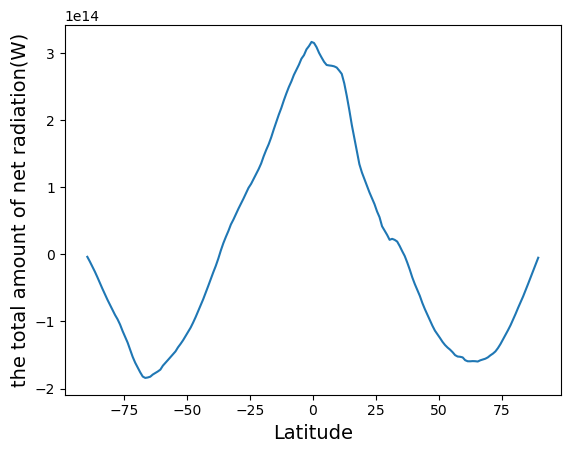

In [11]:
# 2.3
# 对于同一纬度上的网格，面积大小都相等，因此先将同一纬度上的净通量相加
lat_1 = ds_2.toa_net_all_mon.groupby('lat').sum(dim=('time','lon'))

# TA corrected
lat_1 = ds_2.toa_net_all_mon.groupby('lat').sum(dim='lon').mean(dim='time')

df_3 = pd.DataFrame()
df_3['lat']=ds_2['lat']
df_3['amount']=np.array(lat_1)
df_3['radian']=np.deg2rad(df_3['lat'])
df_3['cosσ']= np.cos(df_3['radian'])
# 同一纬度的净通量×面积 = 同一纬度上的净辐射总量
df_3['Total_amount']= 1.2321*(10**10)*(df_3['cosσ'])*(df_3['amount'])
# 作图
x = df_3['lat']
y = df_3['Total_amount']
plt.ylabel('the total amount of net radiation(W)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.plot(x,y)
plt.show()

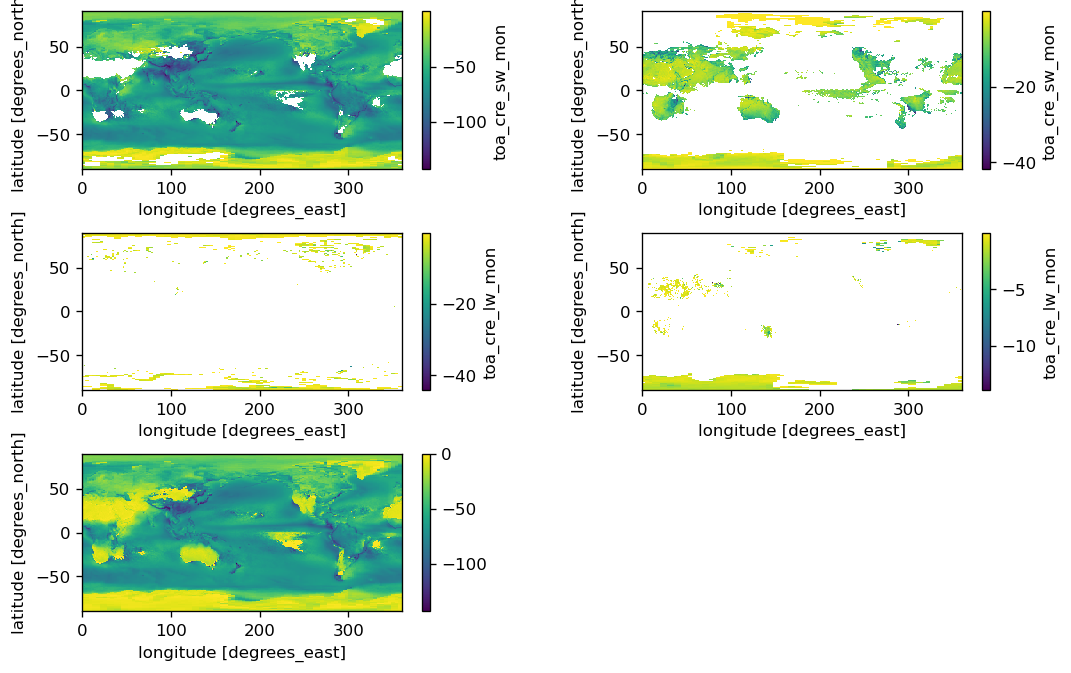

In [18]:
# 2.4（一种想法：涉及高云低云，数据用Cloud Radiative的数据：toa_cre_sw_mon和toa_cre_lw_mon）
plt.figure(figsize = (8,5), dpi = 120) 

# 这里计算高云和低云地区的短波辐射和长波辐射
# 因此使用toa_cre_sw_mon（Top of The Atmosphere Cloud Radiative Effects Shortwave Flux）和toa_cre_lw_mon数据
# outgoing表示云效应中反射出去的那部分（+表示吸收，-表示反射）

# 1.短波辐射在高云区域
sw_high = ds_2.toa_cre_sw_mon.where((ds_2['cldarea_total_daynight_mon']>=75)&(ds_2['toa_cre_sw_mon']<0)).mean(dim='time')
plt.subplot(3,2,1)
sw_high.plot()

# 2.短波辐射在低云区域
sw_low = ds_2.toa_cre_sw_mon.where((ds_2['cldarea_total_daynight_mon']<=25)&(ds_2['toa_cre_sw_mon']<0)).mean(dim='time')
plt.subplot(3,2,2)
sw_low.plot()

# 3.长波辐射在高云区域
lw_high = ds_2.toa_cre_lw_mon.where((ds_2['cldarea_total_daynight_mon']>=75)&(ds_2['toa_cre_lw_mon']<0)).mean(dim='time')
plt.subplot(3,2,3)
lw_high.plot()

# 4.长波辐射在低云区域
lw_low = ds_2.toa_cre_lw_mon.where((ds_2['cldarea_total_daynight_mon']<=25)&(ds_2['toa_cre_lw_mon']<0)).mean(dim='time')
plt.subplot(3,2,4)
lw_low.plot()

# 5.在高云和低云区域的短波和长波辐射总效应复合图
out_sw = ds_2.toa_cre_sw_mon.where(((ds_2['cldarea_total_daynight_mon']<=25)|(ds_2['cldarea_total_daynight_mon']>=75))
                                  &(ds_2['toa_cre_sw_mon']<0)).mean(dim='time')
out_lw = ds_2.toa_cre_lw_mon.where(((ds_2['cldarea_total_daynight_mon']<=25)|(ds_2['cldarea_total_daynight_mon']>=75))
                                   &(ds_2['toa_cre_lw_mon']<0)).mean(dim='time')
# 将空值填充为0
out_sw = out_sw .fillna(0)
out_lw = out_lw.fillna(0)
out_total = out_sw + out_lw
plt.subplot(3,2,5)
out_total.plot()

plt.tight_layout()
plt.subplots_adjust(left = 0, right = 1, top = 1, bottom = 0, wspace = 0.4, hspace = 0.4)
plt.show()

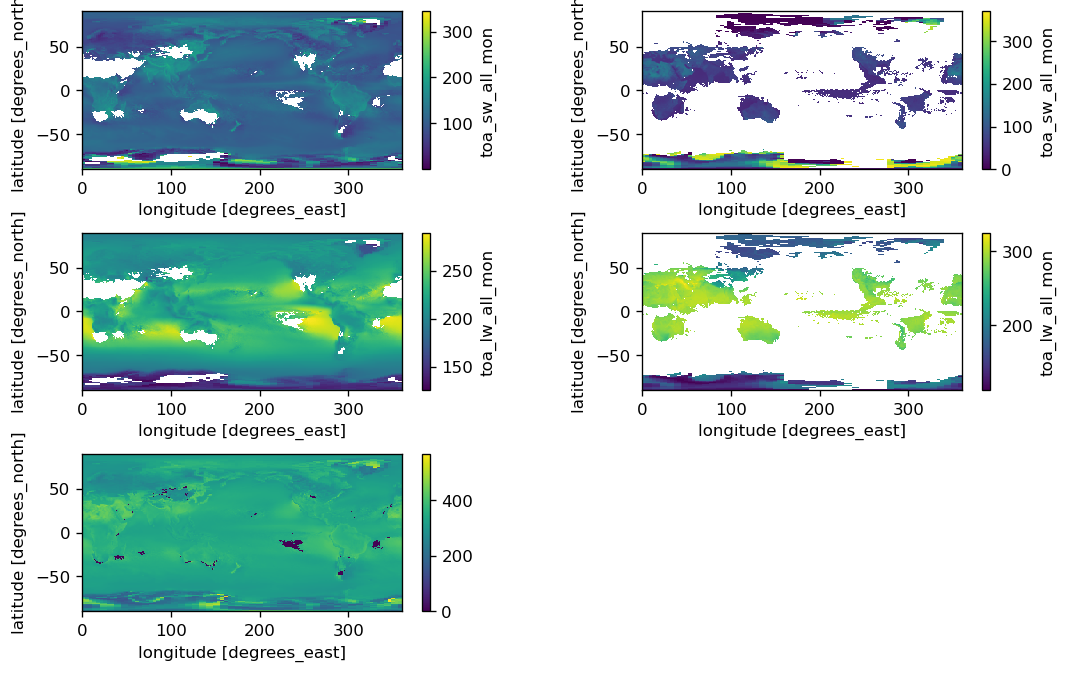

In [12]:
# 2.4（另一种想法：如果不是用数据用Cloud Radiative的数据，还是用All-Sky conditions的数据:toa_sw_all_mon和toa_lw_all_mon,则作图如下）
plt.figure(figsize = (8,5), dpi = 120) 

# 这里计算高云和低云地区的短波辐射和长波辐射
# 因此使用toa_cre_sw_mon（Top of The Atmosphere Cloud Radiative Effects Shortwave Flux）和toa_cre_lw_mon数据
# outgoing表示云效应中反射出去的那部分（+表示吸收，-表示反射）

# 1.短波辐射在高云区域
sw_high_1= ds_2.toa_sw_all_mon.where(ds_2['cldarea_total_daynight_mon']>=75).mean(dim='time')
plt.subplot(3,2,1)
sw_high_1.plot()

# 2.短波辐射在低云区域
sw_low_1= ds_2.toa_sw_all_mon.where(ds_2['cldarea_total_daynight_mon']<=25).mean(dim='time')
plt.subplot(3,2,2)
sw_low_1.plot()

# 3.长波辐射在高云区域
lw_high_1= ds_2.toa_lw_all_mon.where(ds_2['cldarea_total_daynight_mon']>=75).mean(dim='time')
plt.subplot(3,2,3)
lw_high_1.plot()

# 4.长波辐射在低云区域
lw_low_1= ds_2.toa_lw_all_mon.where(ds_2['cldarea_total_daynight_mon']<=25).mean(dim='time')
plt.subplot(3,2,4)
lw_low_1.plot()

# 5.在高云和低云区域的短波和长波辐射总效应复合图
out_sw_1 = ds_2.toa_sw_all_mon.where((ds_2['cldarea_total_daynight_mon']<=25)|(ds_2['cldarea_total_daynight_mon']>=75)).mean(dim='time')
out_lw_1 = ds_2.toa_lw_all_mon.where((ds_2['cldarea_total_daynight_mon']<=25)|(ds_2['cldarea_total_daynight_mon']>=75)).mean(dim='time')

# 将空值填充为0
out_sw_1 = out_sw_1.fillna(0)
out_lw_1 = out_lw_1.fillna(0)
out_total_1 = out_sw_1 + out_lw_1
plt.subplot(3,2,5)
out_total_1.plot()

plt.tight_layout()
plt.subplots_adjust(left = 0, right = 1, top = 1, bottom = 0, wspace = 0.4, hspace = 0.4)
plt.show()

In [13]:
# 2.5
# 选择高云区域的长波和短波辐射通量（云辐射效应的长波和短波辐射）
sw_flux = ds_2.toa_cre_sw_mon.where(((ds_2['cldarea_total_daynight_mon']<=25)|
                                     (ds_2['cldarea_total_daynight_mon']>=75))).mean(dim=('time','lon'))
lw_flux = ds_2.toa_cre_lw_mon.where(((ds_2['cldarea_total_daynight_mon']<=25)|
                                     (ds_2['cldarea_total_daynight_mon']>=75))).mean(dim=('time','lon'))

df_4 = pd.DataFrame()
df_4['lat_1']=sw_flux['lat']
df_4['lat_2']=lw_flux['lat']
df_4['sw_mean']=np.array(sw_flux)
df_4['lw_mean']=np.array(lw_flux)
# 纬度制换算成弧度制
df_4['lat_radian_1']=np.deg2rad(df_4['lat_1'])
df_4['lat_radian_2']=np.deg2rad(df_4['lat_2'])
df_4['cosσ_1']= np.cos(df_4['lat_radian_1'])
df_4['cosσ_2']= np.cos(df_4['lat_radian_2'])
# 每个纬度带所对应的总短波辐射
df_4['sw_aolar_mean']= 1.2321*(10**10)*(df_4['cosσ_1'])*(df_4['sw_mean'])*360
df_4['lw_aolar_mean']= 1.2321*(10**10)*(df_4['cosσ_2'])*(df_4['lw_mean'])*360
# 地球表面的总短波辐射(W)
sw_total = df_4['sw_aolar_mean'].sum()
lw_total = df_4['lw_aolar_mean'].sum()
# 总短波辐射除以地球表面积，即短波辐射通量
sw_mean = sw_total /(4*val*6371*6371*(10**6))
lw_mean = lw_total /(4*val*6371*6371*(10**6))
# 输出云层短波辐射和长波辐射的总效应
global_mean_values = sw_mean + lw_mean
print(global_mean_values)

# TOA Cloud Radiative Shortwave Effects:-56.726
# TOA Cloud Radiative Longwave Effects:34.312
# The global mean values of shortwave and longwave radiation, composited in high and low cloud regions is -22.415

-22.415337660458675


In [14]:
# TA corrected
weights1 = np.cos(np.deg2rad(sw_low_1.lat))
lc_mean_shortwave=sw_low_1.weighted(weights1).mean()
hc_mean_shortwave=sw_high_1.weighted(weights1).mean()
lc_mean_longwave=lw_low_1.weighted(weights1).mean()
hc_mean_longwave=lw_high_1.weighted(weights1).mean()
print(f'The global mean values of shortwave radiation in high and low cloud regions are {hc_mean_shortwave:f} and {lc_mean_shortwave:f} Wm-2 respectively.')
print(f'The global mean values of longwave radiation in high and low cloud regions are {hc_mean_longwave:f} and {lc_mean_longwave:f} Wm-2 respectively.')
print('In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.')

The global mean values of shortwave radiation in high and low cloud regions are 113.157120 and 75.494324 Wm-2 respectively.
The global mean values of longwave radiation in high and low cloud regions are 225.708435 and 270.853027 Wm-2 respectively.
In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.


# PS3. Explore a netCDF dataset
9/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。5/5
2. 用该数据集绘制至少5种不同的图。——出现未命名变量group_data。4/5

In [15]:
# 3. Explore a netCDF dataset
# 打开文件，数据是关于全球陆地每日的最高温度( CPC Global Unified Temperature_maximum temperature，经度和纬度分辨率为0.5°)
ds_3 = xr.open_dataset("tmax.2021.nc",engine="netcdf4")
ds_3

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2022-01-01 16:55:57

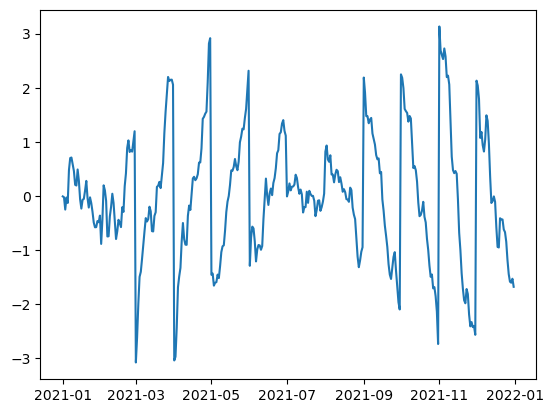

In [16]:
# 3.1
# 先将数据按月分组，减去月度变化之后
aT = ds_3.tmax.groupby('time.month')
aT_anomalies = aT - aT.mean(dim='time')
# 再对其经纬度求平均(调过不是陆地区域的空值)
y = np.nanmean(aT_anomalies,axis = (1,2))
x = pd.date_range(start = '2021-01-01',periods = 365, freq = 'd')
plt.plot(x,y)
plt.show()

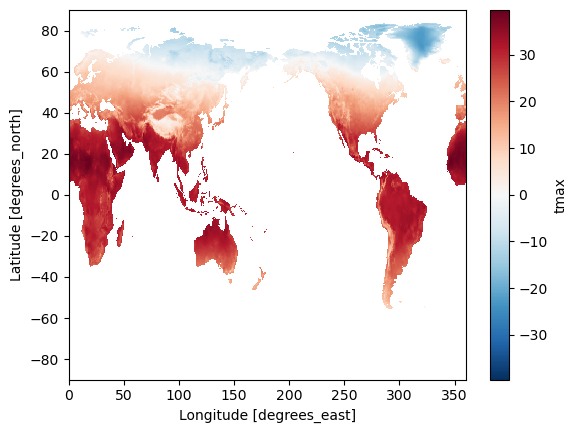

In [17]:
# 3.2 (1) 2021年全球陆地最高气温的年平均值
ds_3.tmax.mean(dim='time').plot()
plt.show()

In [18]:
# 3.2 (2) 全球最高温度的月平均值
group_data.mean().mean(dim=('lat','lon')).plot(marker='*')
plt.show()

NameError: name 'group_data' is not defined

In [19]:
# 3.2 (3) 2021-12-31日的全球最高气温分布
import hvplot.xarray
ds_3.tmax.isel(time=-1).hvplot()

:Image   [lon,lat]   (tmax)

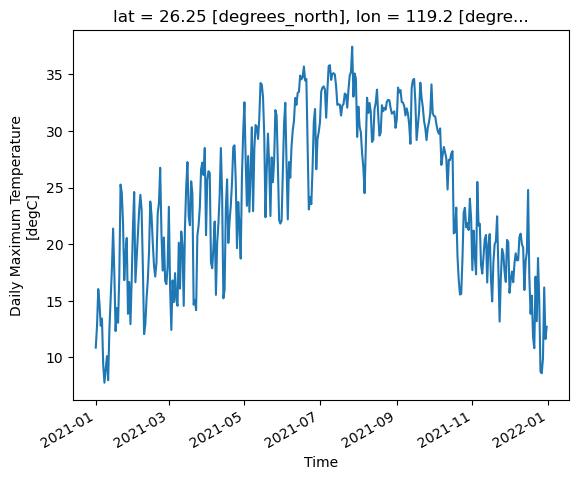

In [20]:
# 3.2 (4) 对指定地区（东经：119.28, 北纬：26.08）的最高温度画时间序列图
ds_3.tmax.sel(lat=26.08,lon=119.28,method='nearest').plot()
plt.show()

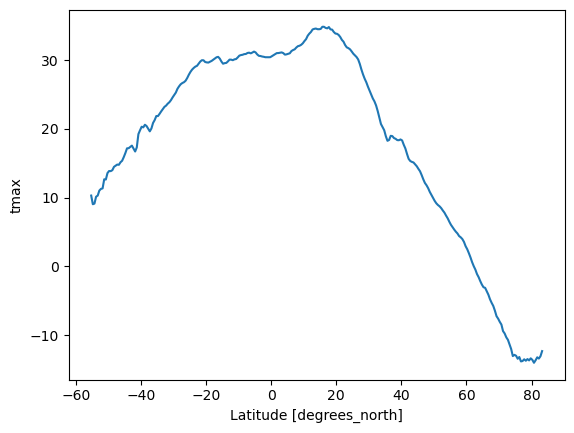

In [21]:
# 3.2 (5) 不同纬度的年平均最高温度(南半球高纬度地区没有陆地，因此没有数据)
ds_3.tmax.mean(dim=('lon','time')).plot()
plt.show()
# 可以看出，赤道地区的年平均最高温度是比较高的，而两级地区的年平均最高温度随着纬度升高而下降